In [1]:
#read the datasetdataset 

import pandas as pd
df=pd.read_csv('C:/Users/arul/OneDrive/Desktop/dataset/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [2]:
df.shape

(13200, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
#feature engineering 

df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

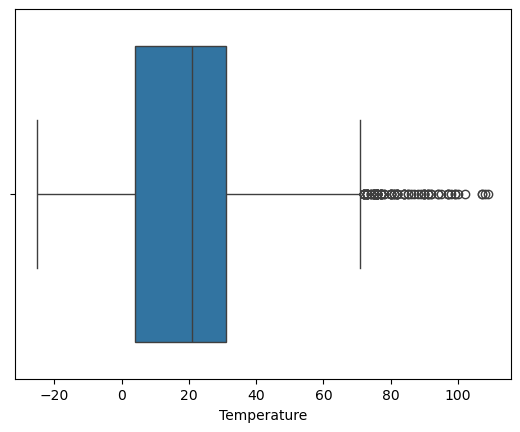

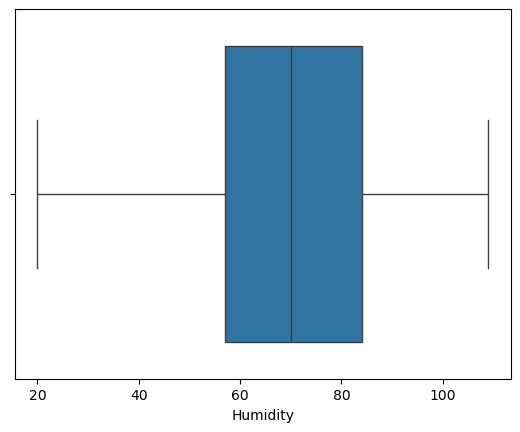

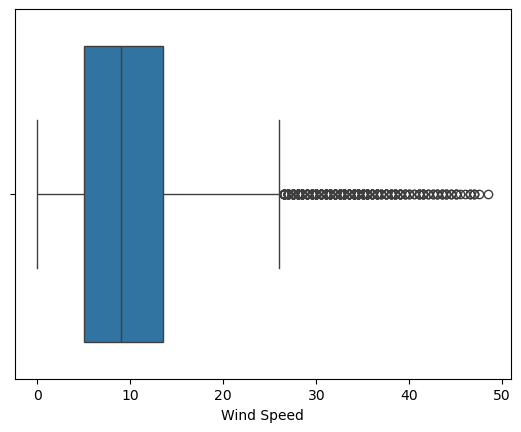

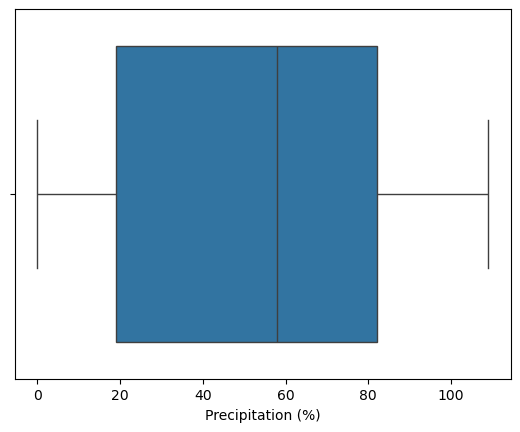

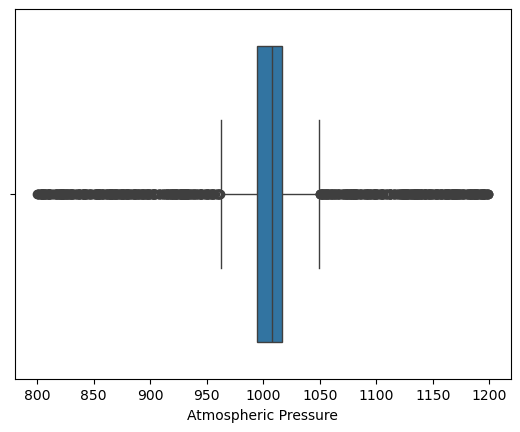

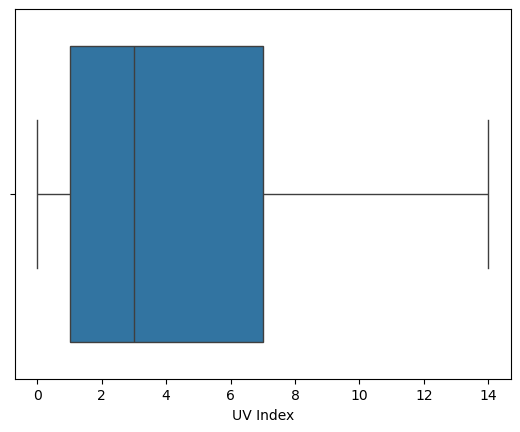

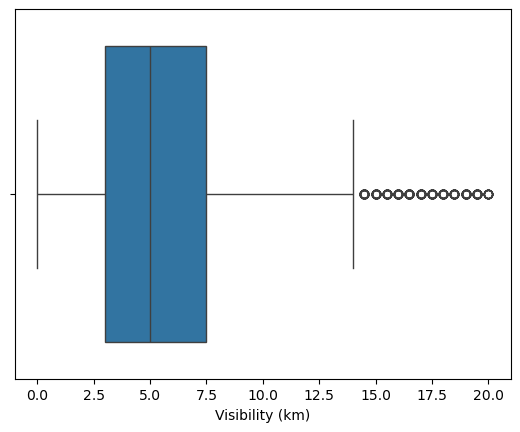

In [5]:
#checking the outliers in num cols
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.select_dtypes(include='number').columns:
    sns.boxplot(x=i,data=df)
    plt.show()

In [6]:
num_cols=df.select_dtypes(include='number')

In [7]:
num_cols.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5


<Axes: >

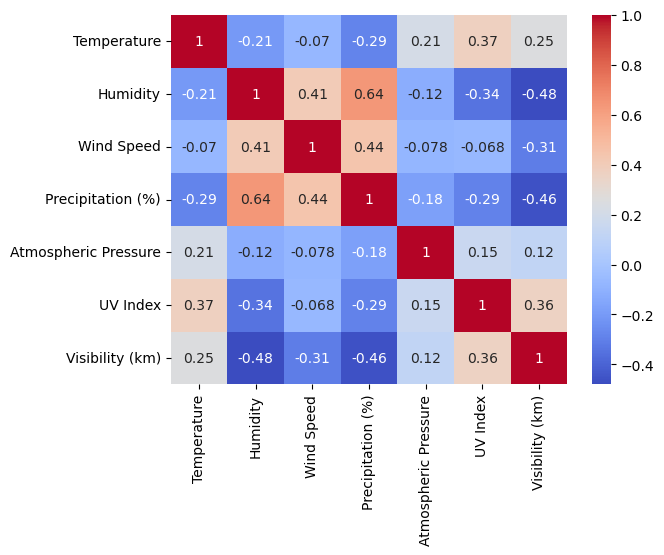

In [8]:
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')

In [9]:
num_cols.corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.209188,0.374773,0.250751
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.120653,-0.342694,-0.479969
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.077757,-0.068147,-0.311828
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.177444,-0.291601,-0.457444
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,1.000000,0.154128,0.120182
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.154128,1.000000,0.362922
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.120182,0.362922,1.000000


In [10]:
a=num_cols
b=df['Weather Type']

In [11]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Perform ANOVA
f_scores, p_values = f_classif(a, b)

# Display results
anova_result = pd.DataFrame({
    'Feature': a.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print(anova_result)


                Feature      F-Score        P-Value
0           Temperature  4797.673503   0.000000e+00
3     Precipitation (%)  3776.770221   0.000000e+00
5              UV Index  2326.576421   0.000000e+00
6       Visibility (km)  1927.720840   0.000000e+00
1              Humidity  1911.351373   0.000000e+00
2            Wind Speed   877.147222   0.000000e+00
4  Atmospheric Pressure   330.396542  7.092867e-207


In [12]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [13]:
num_cols=df.select_dtypes(include='number')
cat_cols=df.select_dtypes(include='object')

In [14]:
num_cols.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5


In [15]:
cat_cols.head()

,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy


In [16]:
import warnings
warnings.filterwarnings('ignore')

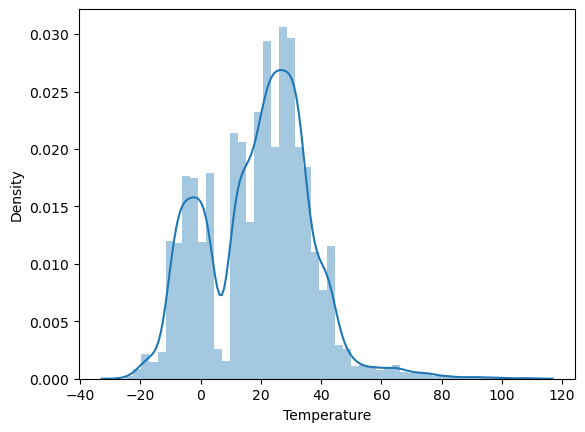

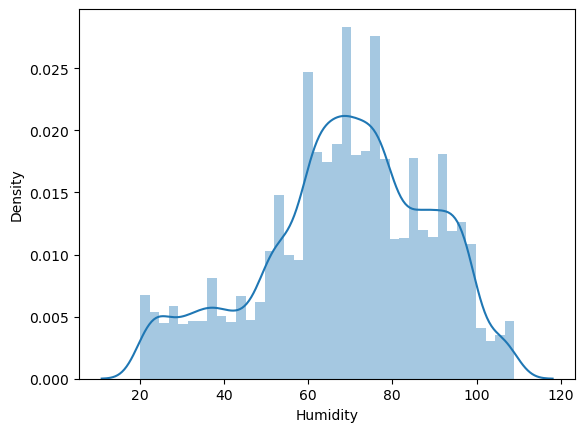

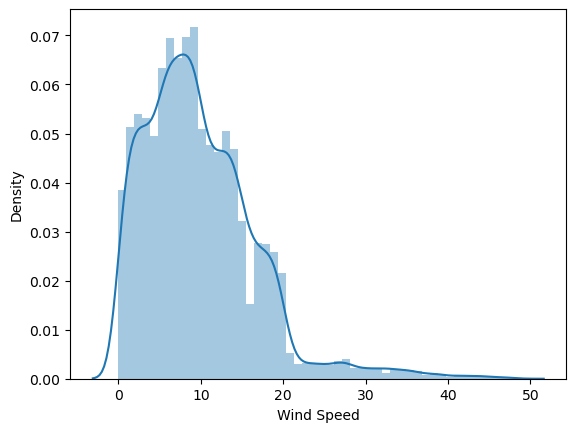

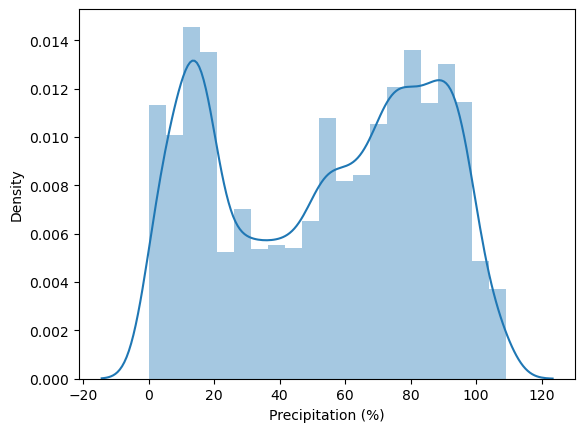

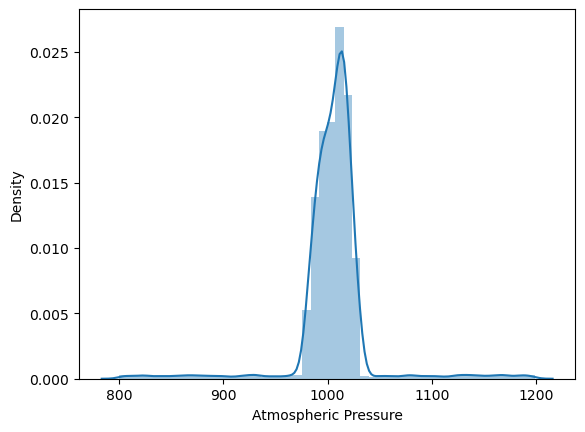

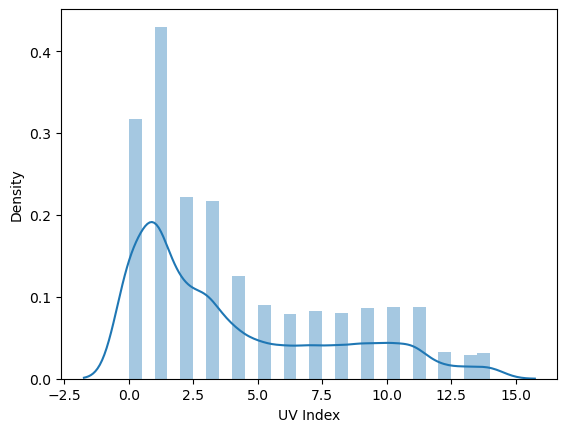

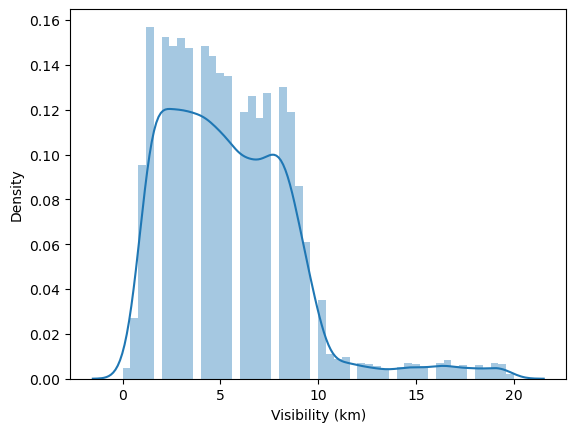

In [17]:
for i in df.select_dtypes(include='number').columns:
    sns.distplot(df[i])
    plt.show()

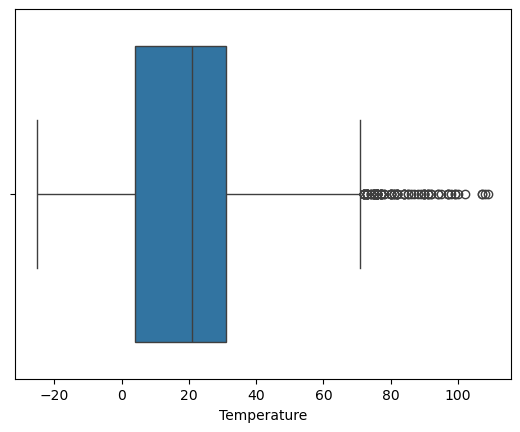

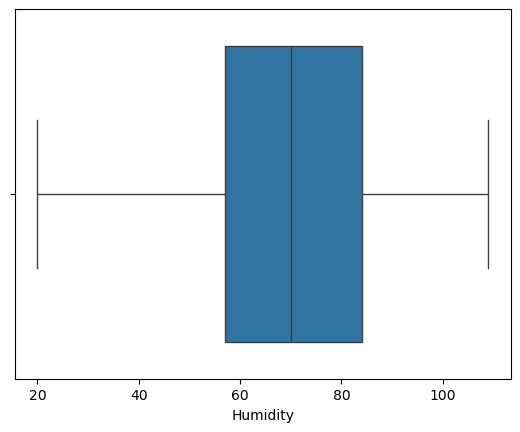

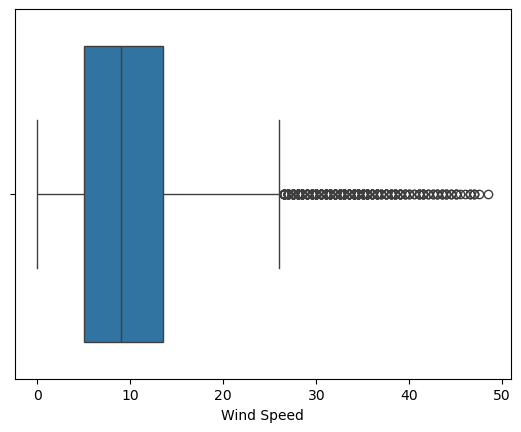

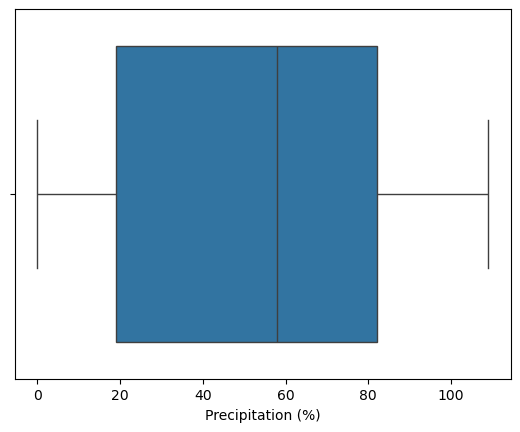

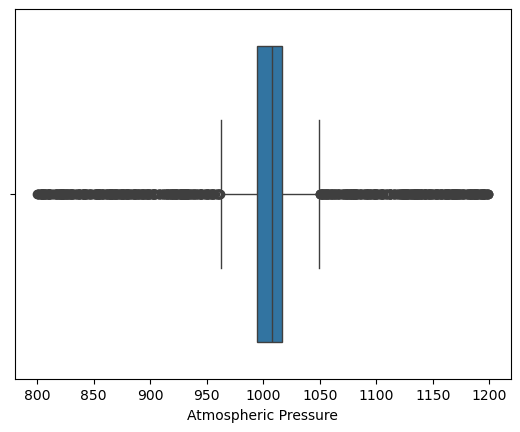

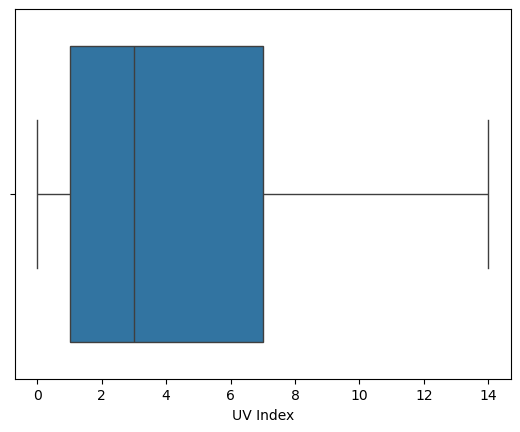

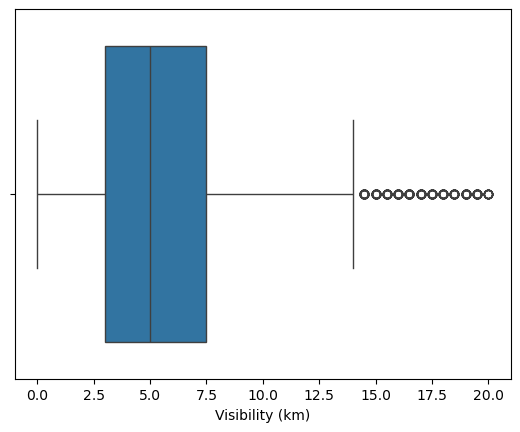

In [18]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(x=i,data=df)
    plt.show()

In [19]:
print(df['Temperature'].mean())
print(df['Temperature'].median())

print(df['Wind Speed'].mean())
print(df['Wind Speed'].median())


print(df['Atmospheric Pressure'].mean())
print(df['Atmospheric Pressure'].median())

print(df['Visibility (km)'].mean())
print(df['Visibility (km)'].median())

		


19.12757575757576
21.0
9.83219696969697
9.0
1005.8278962121212
1007.65
5.462916666666667
5.0


In [20]:
#iqr method  for 'Wind Speed','Visibility (km)' becoz it is skewness 
import numpy as np
def treat_outliers(df,cols):
    q1=df[cols].quantile(0.25)
    q3=df[cols].quantile(0.75)

    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr

    df[cols]=np.where(df[cols]>ub,ub,df[cols])
    df[cols]=np.where(df[cols]<lb,lb,df[cols])
    



In [21]:
treat_outliers(df,['Wind Speed','Visibility (km)','Temperature','Atmospheric Pressure'])

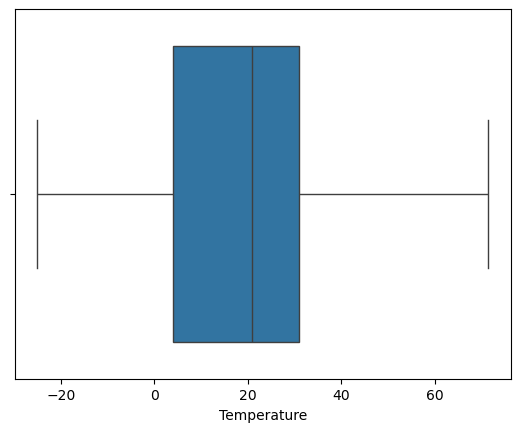

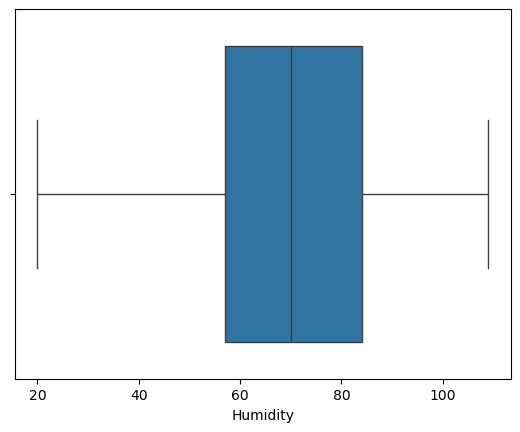

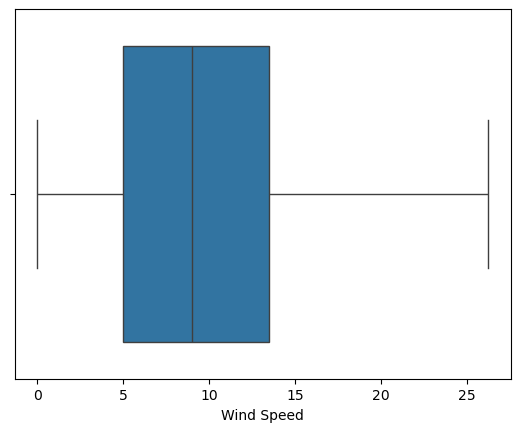

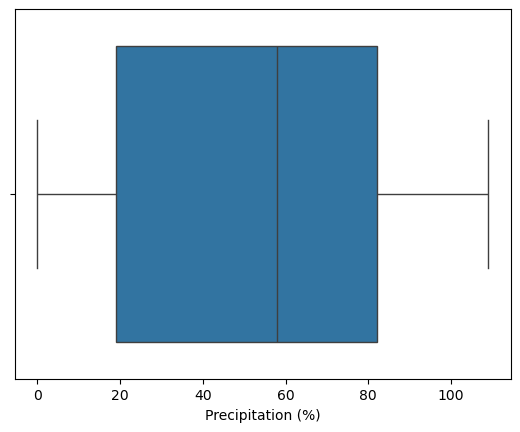

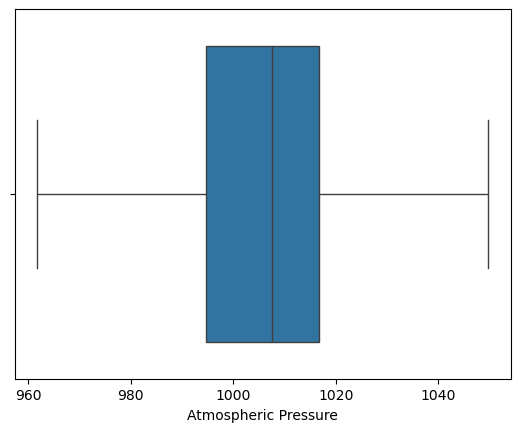

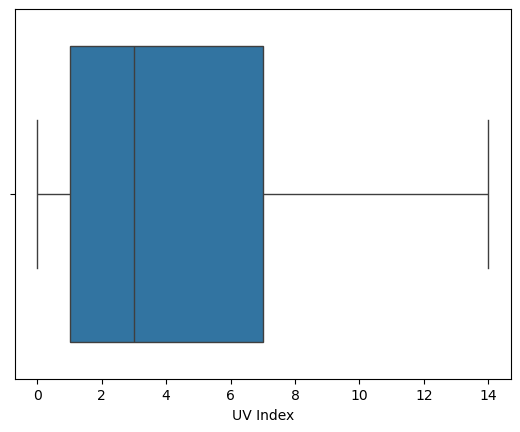

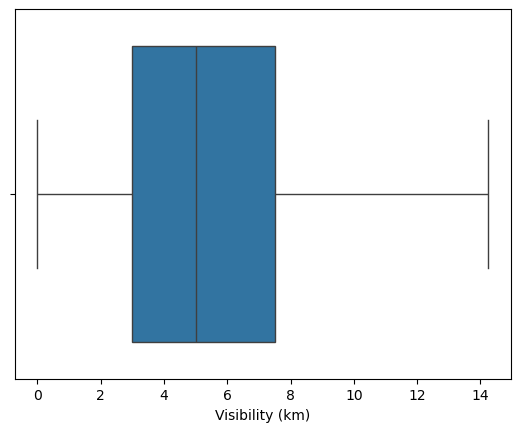

In [22]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(x=i,data=df)
    plt.show()

In [23]:
# Target varibiable :  'Weather Type'

#one hot encoding 

df_enc=pd.get_dummies(df,columns=['Cloud Cover', 'Season', 'Location'])




In [24]:
df_enc.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,False,False,False,True,False,False,False,True,False,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,False,False,False,True,False,True,False,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,True,False,False,False,False,True,False,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,True,False,False,False,False,True,False,False,True,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,False,False,True,False,False,False,False,True,False,False,True


In [25]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [26]:
df_enc['Weather Type'].replace({'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3},inplace=True)

In [27]:
df_enc=df_enc.astype(float)

In [28]:
df_enc.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73.0,9.5,82.0,1010.82,2.0,3.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,39.0,96.0,8.5,71.0,1011.43,7.0,10.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30.0,64.0,7.0,16.0,1018.72,5.0,5.5,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,38.0,83.0,1.5,82.0,1026.25,7.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,27.0,74.0,17.0,66.0,990.67,1.0,2.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [29]:
#there is no need for scalling

#split the x and y 

X=df_enc.drop('Weather Type',axis=1)
y=df_enc[['Weather Type']]

In [30]:
#checking the y value counts to check whether our dataset is imbalanced 

y.value_counts()

Weather Type
0.0             3300
1.0             3300
2.0             3300
3.0             3300
Name: count, dtype: int64

<Axes: ylabel='count'>

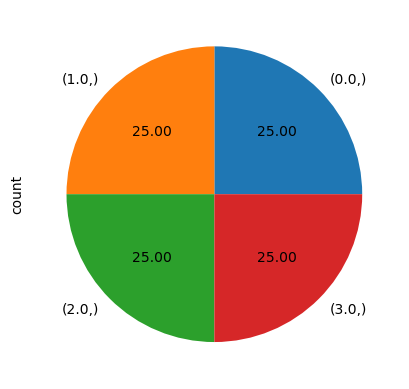

In [31]:
y.value_counts().plot.pie(autopct='%.2f')

So the target variable was equally distributed 
There is no imbalanced in the dataset 

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Loop through models and evaluate with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5,n_jobs=-1)
    print(f"{name}:")
    print(f"  Individual Scores: {scores.}")
    print("-" * 40)

Logistic Regression:
  Individual Scores: [0.87594697 0.87168561 0.87547348 0.87642045 0.87878788]
----------------------------------------
Support Vector Machine:
  Individual Scores: [0.90861742 0.90246212 0.89772727 0.9157197  0.91714015]
----------------------------------------
K-Nearest Neighbors:
  Individual Scores: [0.89630682 0.88731061 0.8844697  0.90340909 0.90151515]
----------------------------------------
Random Forest:
  Individual Scores: [0.91903409 0.91193182 0.90956439 0.9157197  0.92566288]
----------------------------------------
Decision Tree:
  Individual Scores: [0.90956439 0.89867424 0.8967803  0.91335227 0.91287879]
----------------------------------------


In [36]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for name,model in models.items():
    print(f'{name}: parameters ')
    all_models_params=model.get_params()
    print(all_models_params)
    print()
    

Logistic Regression: parameters 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Support Vector Machine: parameters 
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

K-Nearest Neighbors: parameters 
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Random Forest: parameters 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_sam

Random Forest:
  Individual Scores: [0.91903409 0.91193182 0.90956439 0.9157197  0.92566288]
random forest performs well in cv with 0.92%

Random Forest: parameters 
{
 'criterion': 'gini', 
 'max_depth': None,   
 'min_samples_leaf': 1, 
 'min_samples_split': 2, 
'n_estimators': 100, 
'n_jobs': None, 
'verbose': 0, 
'warm_start': False}

In [42]:
## from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid={
    'n_estimators': [100,200,300,400],
    'max_depth':[10,20,30.40],
    'min_samples_split':[2,7,10],
    'min_samples_leaf':[1,3,7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf=RandomForestClassifier()
randomcv_model=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5,               # 5-fold cross-validation
    verbose=2,
    n_jobs=-1)

randomcv_model.fit(X_train, y_train)

print("✅ Best Parameters:", randomcv_model.best_params_)
print("✅ Best Cross-Validation Score:", randomcv_model.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'log_loss'}
✅ Best Cross-Validation Score: 0.9151515151515153


In [48]:
#fitting the model 
from sklearn.metrics import accuracy_score

best_rf_model=RandomForestClassifier(
  n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='sqrt',
    max_depth=20,
    criterion='log_loss'
)

best_rf_model.fit(X_train,y_train)
x_pred=best_rf_model.predict(X_train)
y_pred=best_rf_model.predict(X_test)
print(f"Training Accuracy  : {accuracy_score(y_train, x_pred)}")
print(f"Testing  Accuracy  : {accuracy_score(y_test, y_pred)}")

Training Accuracy  : 0.9709280303030303
Testing  Accuracy  : 0.9200757575757575
